# LSA & LDA Results Visualization

This notebook demonstrates how to load and visualize the `.pkl` results from your topic modeling pipeline.

In [11]:
! pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [12]:
# Import required libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Load Data using Kedro Catalog

In [13]:
# Option 1: Use Kedro catalog (recommended for Kedro projects)
try:
    # When running 'kedro jupyter notebook', context is automatically available
    catalog = context.catalog
    print("✅ Using Kedro catalog")
except NameError:
    # Option 2: Load pickle files directly (works anywhere)
    print("📂 Loading data directly from pickle files...")
    import pickle
    
    def load_pkl(filepath):
        with open(filepath, 'rb') as f:
            return pickle.load(f)
    
    # Create a simple catalog-like dict
    class SimpleCatalog:
        def load(self, name):
            file_map = {
                'lsa_results_2006_2015': '../data/07_model_output/lsa_results_2006_2015.pkl',
                'lsa_results_2016_2025': '../data/07_model_output/lsa_results_2016~2025.pkl',
                'lda_results_2006_2015': '../data/07_model_output/lda_results_2006_2015.pkl',
                'lda_results_2016_2025': '../data/07_model_output/lda_results_2016~2025.pkl',
                'lsa_topic_comparison': '../data/08_reporting/lsa_topic_comparison.csv',
                'lda_topic_comparison': '../data/08_reporting/lda_topic_comparison.csv',
            }
            filepath = file_map.get(name)
            if filepath.endswith('.pkl'):
                return load_pkl(filepath)
            elif filepath.endswith('.csv'):
                return pd.read_csv(filepath)
    
    catalog = SimpleCatalog()
    print("✅ Using direct file loading")

print("Catalog ready!")

[12/20/25 23:00:02] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=373744;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=589558;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

✅ Using Kedro catalog
Catalog ready!


## 2. Load LSA Results

In [14]:
# Load LSA results for both periods
lsa_2006 = catalog.load('lsa_results_2006_2015')
lsa_2016 = catalog.load('lsa_results_2016_2025')

print("LSA 2006-2015 Results Keys:")
print(list(lsa_2006.keys()))

print("\nTotal Variance Explained (2006-2015):", f"{lsa_2006['total_variance_explained']:.2%}")
print("Total Variance Explained (2016-2025):", f"{lsa_2016['total_variance_explained']:.2%}")

[12/20/25 23:00:04] INFO     Loading data from lsa_results_2006_2015 (PickleDataset)...        ]8;id=57881;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=825840;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

                    INFO     Loading data from lsa_results_2016_2025 (PickleDataset)...        ]8;id=59570;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=94493;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

LSA 2006-2015 Results Keys:
['model', 'doc_topic_matrix', 'topic_term_matrix', 'topic_terms', 'doc_topics', 'explained_variance', 'total_variance_explained', 'feature_names', 'pairwise_similarities', 'similar_documents']

Total Variance Explained (2006-2015): 47.91%
Total Variance Explained (2016-2025): 46.45%


## 3. Visualize LSA Topics - Top Terms

In [15]:
# Display topic terms
print("\n=== LSA Topics (2006-2015) ===")
display(lsa_2006['topic_terms'])

print("\n=== LSA Topics (2016-2025) ===")
display(lsa_2016['topic_terms'])


=== LSA Topics (2006-2015) ===


,topic_id,top_terms,term_weights
0,0,"部落, 原住民, 庫斯, 泰雅族, 傳統, 泰雅, 文化, 司馬, 族人, 司馬 庫斯, 青...","[0.25978058965828604, 0.15219692406777793, 0.1..."
1,1,"警方, 現場, 樹林, 發現, 突然, 打獵, 公尺, 有人, 留在 現場, 相驗, 發時,...","[0.235932744287807, 0.17670720337441836, 0.158..."
2,2,"傳統, 鎮西堡, 部落, 鎮西堡 部落, 小米, 依倚, 庫斯 部落, 文化, 領域, 司馬...","[0.18491723028174703, 0.14511920104405235, 0.1..."
3,3,"依倚, 庫斯 部落, 司馬, 庫斯, 司馬 庫斯, 拉互, 拉互 依倚, 故事, 感謝, 領...","[0.2161140343834973, 0.20582246796008, 0.18653..."
4,4,"原民會, 雲天, 公尺, 萬元, 觀光, 鄉長, 鄉長 雲天, 民族, 縣長, 邱鏡淳, 當...","[0.1992992568523543, 0.1958219624167521, 0.157..."
5,5,"小米, 鎮西堡, 鎮西堡 部落, 不能, 理事, 協會 理事, 泰雅, 身體, 傳統, 每年...","[0.21383605054331084, 0.1784892132757669, 0.15..."



=== LSA Topics (2016-2025) ===


,topic_id,top_terms,term_weights
0,0,"部落, 公所, 表示, 縣府, 今天, 遊客, 目前, 控溪, 相關, 交通, 政府, 安全...","[0.18916284376398376, 0.15457231783230865, 0.1..."
1,1,"控溪 部落, 控溪, 撤離, 山頭, 早上, 竹線, 今天, 民眾, 注意, 溢流, 今天 ...","[0.1818693976477566, 0.17501484289065614, 0.15..."
2,2,"遊客, 交通, 車潮, 直接, 尖峰, 一度, 道路, 垃圾, 通往, 內灣, 居民, 很多...","[0.24998996411644092, 0.1949453500603471, 0.18..."
3,3,"醫院, 患者, 男子, 使用, 點分, 執行, 精神, 消防局, 期間, 原住民, 隨即, ...","[0.2319212397890184, 0.20218864012691246, 0.18..."
4,4,"歷史, 大家, 登場, 指出, 活動, 同步, 甜柿, 尖石 尖石, 不會, 只要, 表示 ...","[0.28300735671050853, 0.2589772604539251, 0.22..."
5,5,"勇士, 泰雅, 所在, 大橋, 尖石 大橋, 文科, 受傷, 搶救, 調查, 車潮, 一度,...","[0.20911066831023217, 0.2072320350650136, 0.17..."


## 4. Visualize Explained Variance

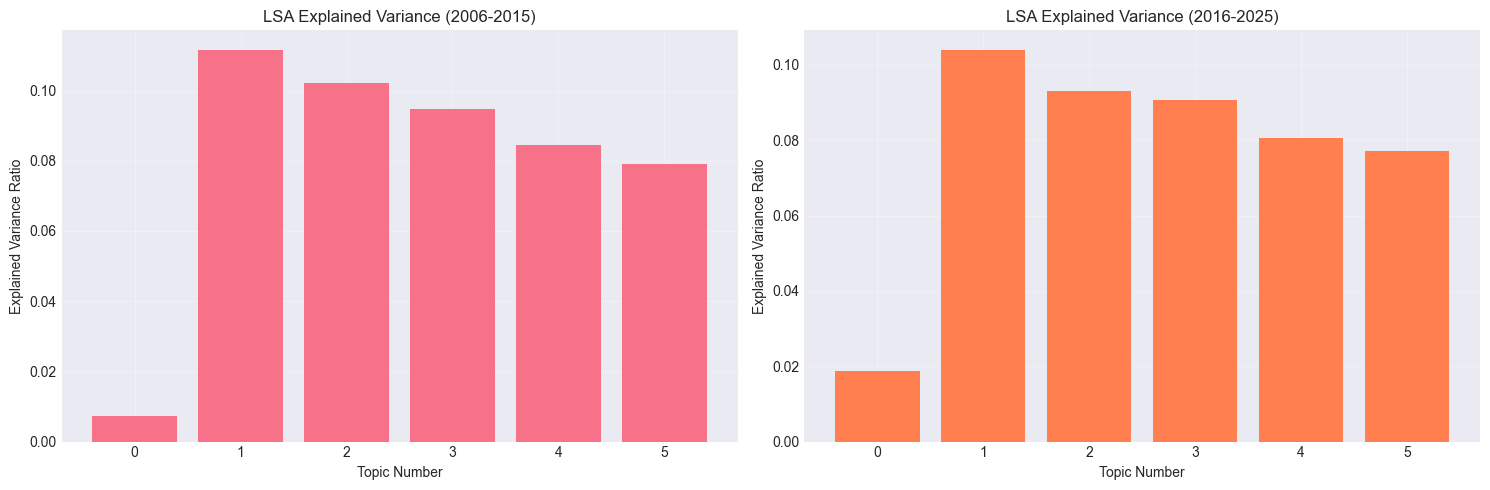

In [16]:
# Plot explained variance for both periods
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 2006-2015
axes[0].bar(range(len(lsa_2006['explained_variance'])), 
            lsa_2006['explained_variance'])
axes[0].set_xlabel('Topic Number')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('LSA Explained Variance (2006-2015)')
axes[0].grid(True, alpha=0.3)

# 2016-2025
axes[1].bar(range(len(lsa_2016['explained_variance'])), 
            lsa_2016['explained_variance'], color='coral')
axes[1].set_xlabel('Topic Number')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('LSA Explained Variance (2016-2025)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Word Clouds for LSA Topics

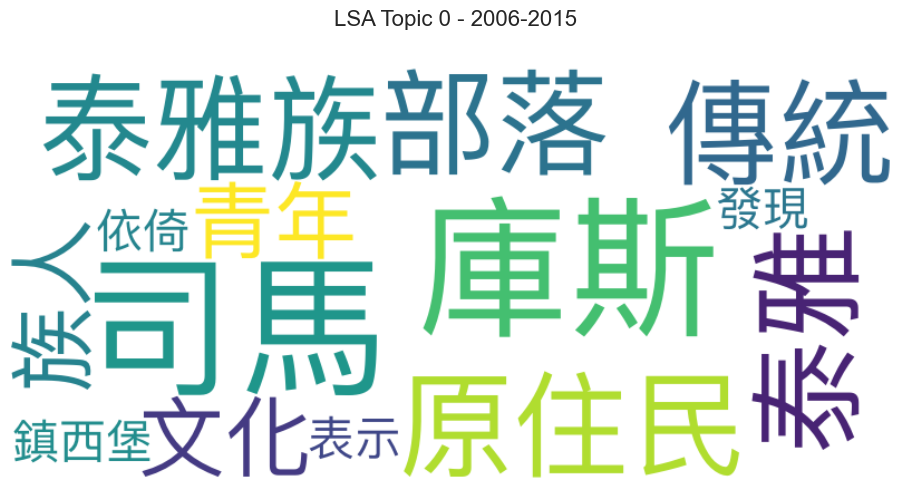

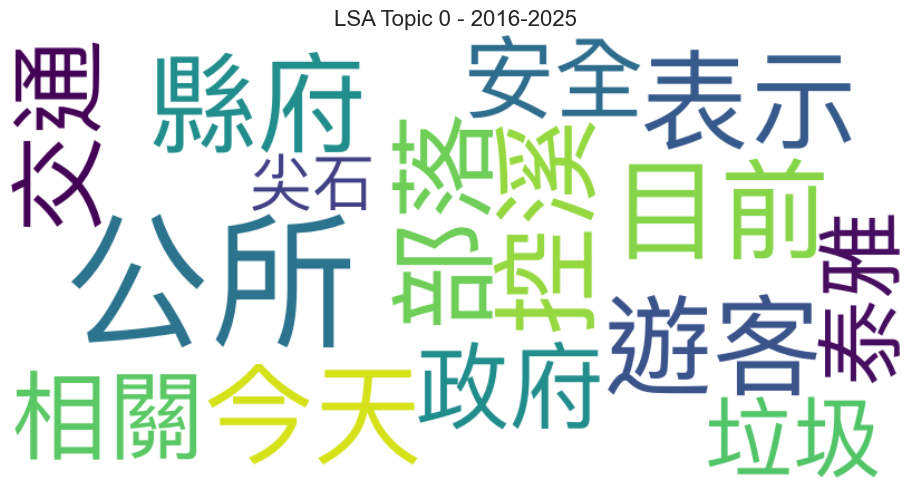

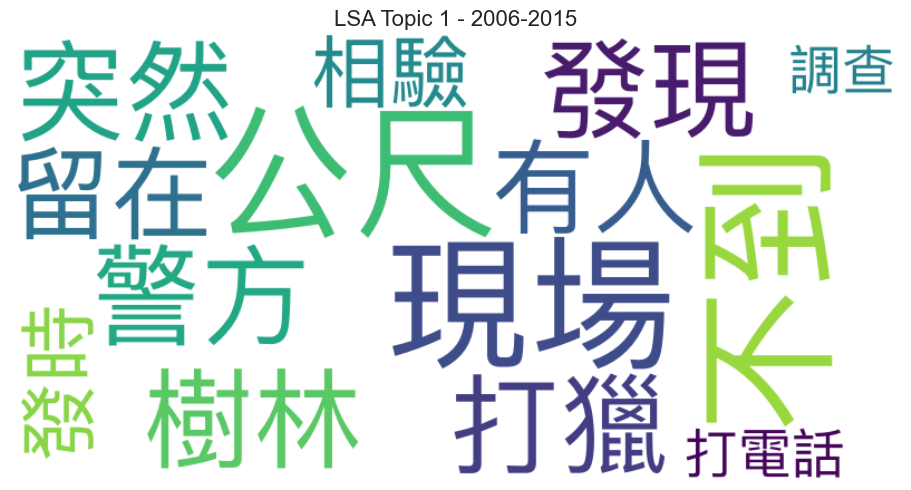

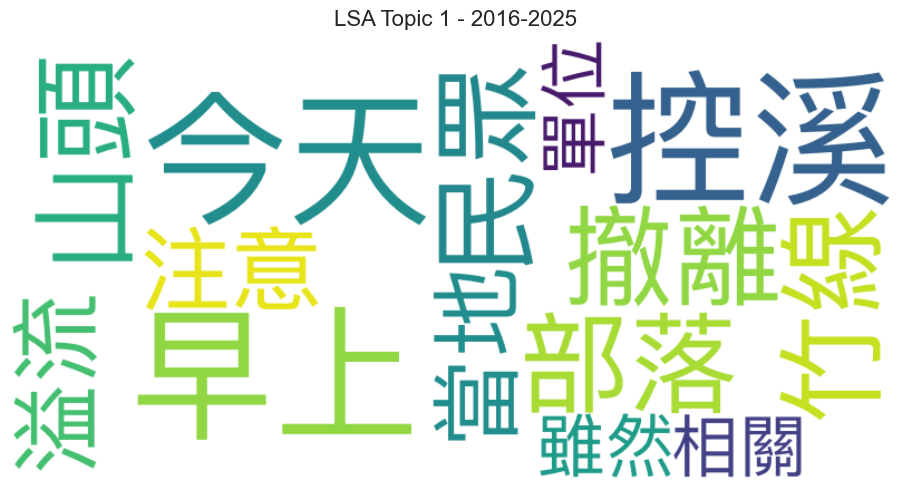

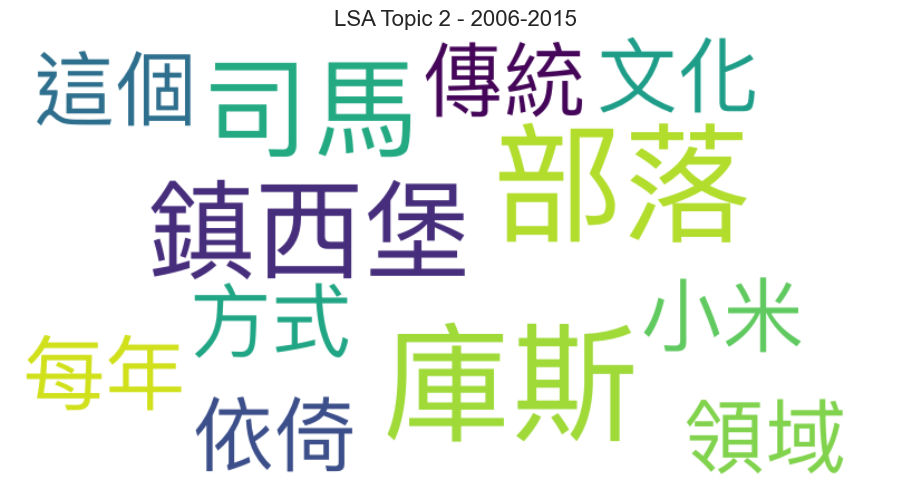

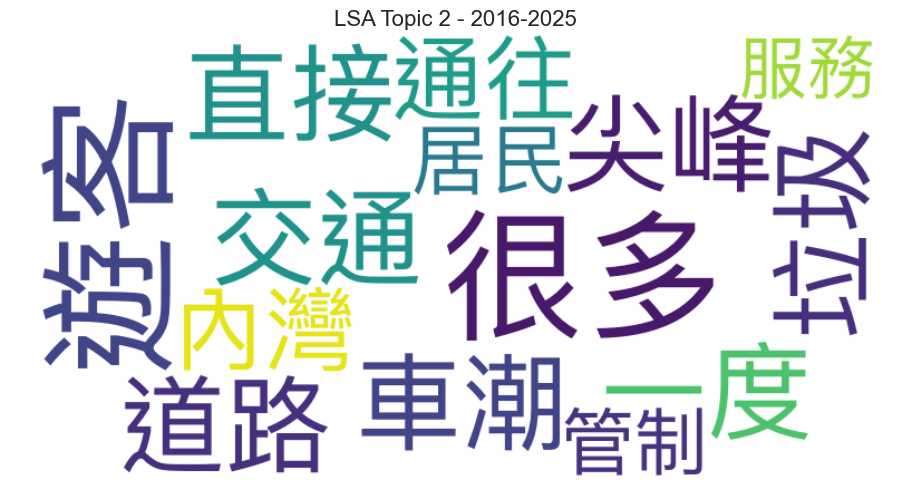

In [17]:
def create_topic_wordcloud(topic_terms_df, topic_id, period):
    """Create word cloud for a specific topic"""
    terms = topic_terms_df.iloc[topic_id]['top_terms']
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white',
                          font_path='/System/Library/Fonts/PingFang.ttc',  # Chinese font
                          ).generate(terms)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'LSA Topic {topic_id} - {period}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Show word clouds for first 3 topics
for i in range(min(3, len(lsa_2006['topic_terms']))):
    create_topic_wordcloud(lsa_2006['topic_terms'], i, '2006-2015')
    create_topic_wordcloud(lsa_2016['topic_terms'], i, '2016-2025')

## 6. Load LDA Results

In [18]:
# Load LDA results
lda_2006 = catalog.load('lda_results_2006_2015')
lda_2016 = catalog.load('lda_results_2016_2025')

print("LDA 2006-2015 Results Keys:")
print(list(lda_2006.keys()))

print("\nPerplexity (2006-2015):", lda_2006['perplexity'])
print("Perplexity (2016-2025):", lda_2016['perplexity'])
print("\nLog Likelihood (2006-2015):", lda_2006['log_likelihood'])
print("Log Likelihood (2016-2025):", lda_2016['log_likelihood'])

[12/20/25 23:00:31] INFO     Loading data from lda_results_2006_2015 (PickleDataset)...        ]8;id=584421;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=372819;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

[12/20/25 23:00:32] INFO     Loading data from lda_results_2016_2025 (PickleDataset)...        ]8;id=999702;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=861501;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

LDA 2006-2015 Results Keys:
['model', 'doc_topic_matrix', 'topic_term_matrix', 'topic_terms', 'doc_topics', 'perplexity', 'log_likelihood', 'feature_names']

Perplexity (2006-2015): 285.08445105802195
Perplexity (2016-2025): 364.4109199790556

Log Likelihood (2006-2015): -5160.9931212152715
Log Likelihood (2016-2025): -7154.616226053506


## 7. Visualize LDA Topics

In [19]:
# Display LDA topic terms
print("\n=== LDA Topics (2006-2015) ===")
display(lda_2006['topic_terms'])

print("\n=== LDA Topics (2016-2025) ===")
display(lda_2016['topic_terms'])


=== LDA Topics (2006-2015) ===


,topic_id,top_terms,term_probabilities
0,0,"部落, 泰雅族, 族人, 青年, 泰雅, 尋根, 文化, 發現, 原住民, 雲天, 生活, ...","[0.2063282057577983, 0.08389749683536794, 0.08..."
1,1,"公尺, 現場, 山谷, 警方, 一年, 意外, 幾乎, 夫妻, 庫斯, 有人, 突然, 公里...","[0.14553667574266174, 0.11735626871502437, 0.0..."
2,2,"祖靈, 突然, 一名, 泰雅, 表示, 九月, 日本, 昨天, 身體, 母親, 人瑞, 家人...","[0.11608951744119031, 0.1160835122823649, 0.09..."
3,3,"部落, 庫斯, 泰雅族, 小米, 司馬, 傳統, 依倚, 庫斯 部落, 司馬 庫斯, 原住民...","[0.24442810413487134, 0.07973961374460053, 0.0..."
4,4,"部落, 原住民, 遊客, 鎮西堡, 多年, 神木, 最近, 可以, 警方, 整個, 灌溉, ...","[0.14188403343838346, 0.12210356203430654, 0.0..."
5,5,"公所, 表示, 保留, 當年, 觀光產業, 尖石 公所, 體驗, 加上, 協會, 許多, 觀...","[0.15720946239704284, 0.08176130342488162, 0.0..."



=== LDA Topics (2016-2025) ===


,topic_id,top_terms,term_probabilities
0,0,"表示, 部落, 縣府, 安全, 醫院, 控溪, 溢流, 執行, 使用, 精神, 相關, 控溪...","[0.08772337324587187, 0.08771952337927923, 0.0..."
1,1,"甜柿, 今年, 服務, 表示, 活動, 安全, 地方, 公共, 公所, 萬元, 全新, 交通...","[0.17131161144567267, 0.09656368484482321, 0.0..."
2,2,"山頭, 文科, 民眾, 相當, 紅葉, 縣長, 其中, 縣長 文科, 今天, 提醒, 開始,...","[0.13470510489482443, 0.09219585546834541, 0.0..."
3,3,"泰雅, 勇士, 公所, 表示, 縣府, 部落, 撤離, 園區, 曾國大, 需要, 目前, 今...","[0.12246875331999732, 0.12246510818170515, 0.1..."
4,4,"部落, 垃圾, 問題, 遊客, 活動, 使用, 土地, 消防局, 患者, 政府, 前往, 符...","[0.15047066672493065, 0.10475506456112611, 0.0..."
5,5,"部落, 當地, 公所, 垃圾, 交通, 遊客, 居民, 希望, 今天, 造成, 尖石 鄉長,...","[0.14433923368144094, 0.09710500756490188, 0.0..."


## 8. Document-Topic Distribution Heatmap

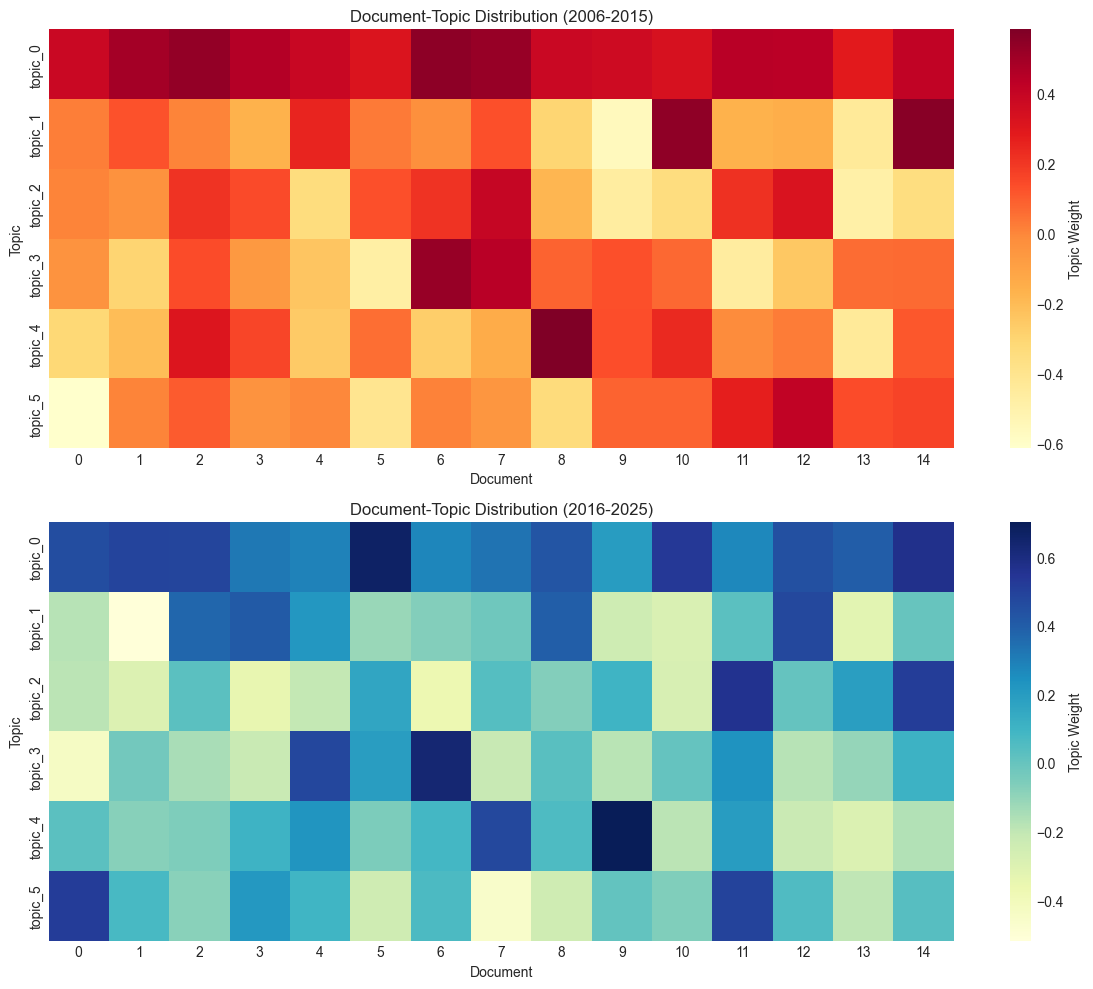

In [20]:
# Get document-topic matrices
doc_topics_2006 = lsa_2006['doc_topics'].filter(regex='^topic_')
doc_topics_2016 = lsa_2016['doc_topics'].filter(regex='^topic_')

# Plot heatmaps
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 2006-2015
sns.heatmap(doc_topics_2006.T, cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Topic Weight'})
axes[0].set_xlabel('Document')
axes[0].set_ylabel('Topic')
axes[0].set_title('Document-Topic Distribution (2006-2015)')

# 2016-2025
sns.heatmap(doc_topics_2016.T, cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Topic Weight'})
axes[1].set_xlabel('Document')
axes[1].set_ylabel('Topic')
axes[1].set_title('Document-Topic Distribution (2016-2025)')

plt.tight_layout()
plt.show()

## 10. Load Comparison Reports

In [22]:
# Load comparison CSVs
lsa_comparison = catalog.load('lsa_topic_comparison')
lda_comparison = catalog.load('lda_topic_comparison')

print("\n=== LSA Topic Comparison ===")
display(lsa_comparison)

print("\n=== LDA Topic Comparison ===")
display(lda_comparison)

[12/20/25 23:00:42] INFO     Loading data from lsa_topic_comparison (CSVDataset)...            ]8;id=23897;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=500800;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

                    INFO     Loading data from lda_topic_comparison (CSVDataset)...            ]8;id=389278;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=513741;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\


=== LSA Topic Comparison ===


,period,topic_id,top_terms,avg_prevalence,explained_variance
0,2006-2015,0,"部落, 原住民, 庫斯, 泰雅族, 傳統, 泰雅, 文化, 司馬, 族人, 司馬 庫斯, 青...",0.420098,0.007171
1,2006-2015,1,"警方, 現場, 樹林, 發現, 突然, 打獵, 公尺, 有人, 留在 現場, 相驗, 發時,...",-0.007365,0.111573
2,2006-2015,2,"傳統, 鎮西堡, 部落, 鎮西堡 部落, 小米, 依倚, 庫斯 部落, 文化, 領域, 司馬...",-0.035747,0.102010
3,2006-2015,3,"依倚, 庫斯 部落, 司馬, 庫斯, 司馬 庫斯, 拉互, 拉互 依倚, 故事, 感謝, 領...",-0.019393,0.094655
4,2006-2015,4,"原民會, 雲天, 公尺, 萬元, 觀光, 鄉長, 鄉長 雲天, 民族, 縣長, 邱鏡淳, 當...",0.000251,0.084463
5,2006-2015,5,"小米, 鎮西堡, 鎮西堡 部落, 不能, 理事, 協會 理事, 泰雅, 身體, 傳統, 每年...",-0.010039,0.079193
6,2016-2025,0,"部落, 公所, 表示, 縣府, 今天, 遊客, 目前, 控溪, 相關, 交通, 政府, 安全...",0.410736,0.018789
7,2016-2025,1,"控溪 部落, 控溪, 撤離, 山頭, 早上, 竹線, 今天, 民眾, 注意, 溢流, 今天 ...",0.010243,0.103987
8,2016-2025,2,"遊客, 交通, 車潮, 直接, 尖峰, 一度, 道路, 垃圾, 通往, 內灣, 居民, 很多...",-0.009741,0.093179
9,2016-2025,3,"醫院, 患者, 男子, 使用, 點分, 執行, 精神, 消防局, 期間, 原住民, 隨即, ...",0.011600,0.090657



=== LDA Topic Comparison ===


,period,topic_id,top_terms,avg_prevalence
0,2006-2015,0,"部落, 泰雅族, 族人, 青年, 泰雅, 尋根, 文化, 發現, 原住民, 雲天, 生活, ...",0.199998
1,2006-2015,1,"公尺, 現場, 山谷, 警方, 一年, 意外, 幾乎, 夫妻, 庫斯, 有人, 突然, 公里...",0.068721
2,2006-2015,2,"祖靈, 突然, 一名, 泰雅, 表示, 九月, 日本, 昨天, 身體, 母親, 人瑞, 家人...",0.133863
3,2006-2015,3,"部落, 庫斯, 泰雅族, 小米, 司馬, 傳統, 依倚, 庫斯 部落, 司馬 庫斯, 原住民...",0.330522
4,2006-2015,4,"部落, 原住民, 遊客, 鎮西堡, 多年, 神木, 最近, 可以, 警方, 整個, 灌溉, ...",0.198794
5,2006-2015,5,"公所, 表示, 保留, 當年, 觀光產業, 尖石 公所, 體驗, 加上, 協會, 許多, 觀...",0.068103
6,2016-2025,0,"表示, 部落, 縣府, 安全, 醫院, 控溪, 溢流, 執行, 使用, 精神, 相關, 控溪...",0.134407
7,2016-2025,1,"甜柿, 今年, 服務, 表示, 活動, 安全, 地方, 公共, 公所, 萬元, 全新, 交通...",0.134243
8,2016-2025,2,"山頭, 文科, 民眾, 相當, 紅葉, 縣長, 其中, 縣長 文科, 今天, 提醒, 開始,...",0.067891
9,2016-2025,3,"泰雅, 勇士, 公所, 表示, 縣府, 部落, 撤離, 園區, 曾國大, 需要, 目前, 今...",0.330629


## 11. Visualize Topic Evolution

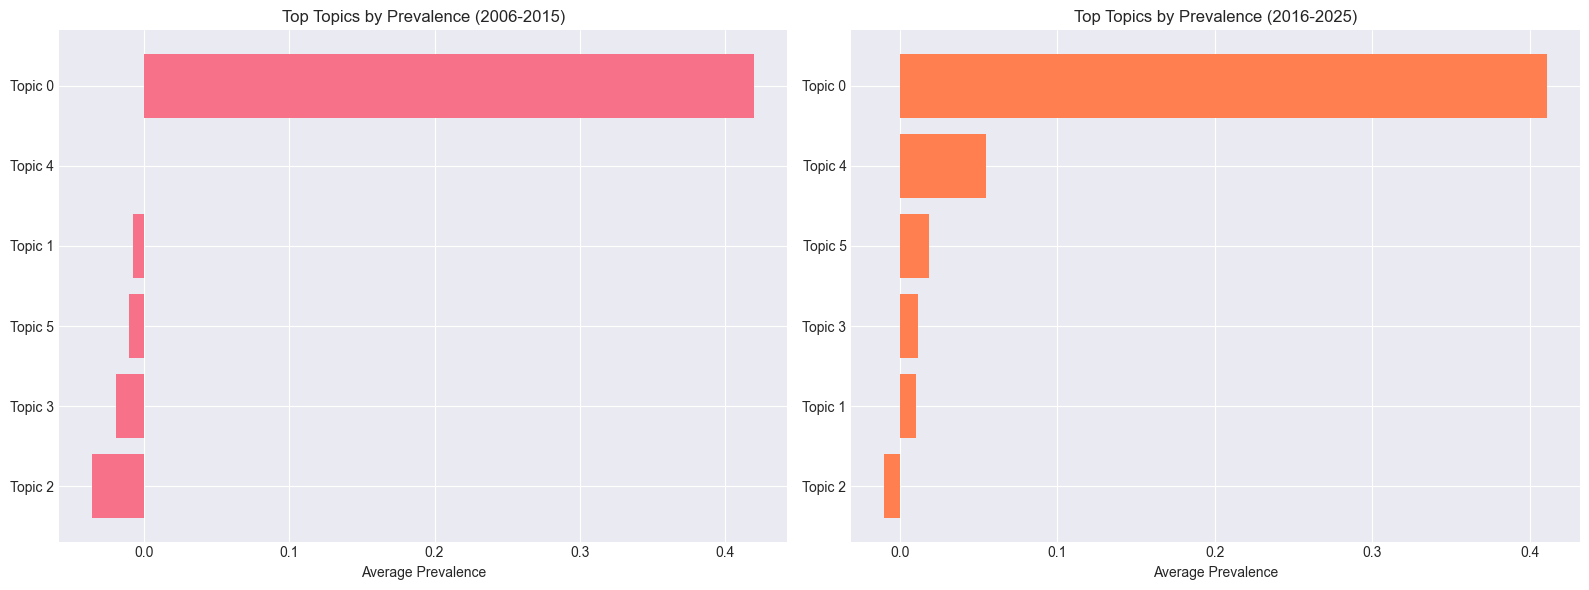

In [23]:
# Filter by period and plot prevalence
lsa_2006_comp = lsa_comparison[lsa_comparison['period'] == '2006-2015'].sort_values('avg_prevalence', ascending=False)
lsa_2016_comp = lsa_comparison[lsa_comparison['period'] == '2016-2025'].sort_values('avg_prevalence', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2006-2015 top topics
axes[0].barh(range(len(lsa_2006_comp)), lsa_2006_comp['avg_prevalence'])
axes[0].set_yticks(range(len(lsa_2006_comp)))
axes[0].set_yticklabels([f"Topic {i}" for i in lsa_2006_comp['topic_id']])
axes[0].set_xlabel('Average Prevalence')
axes[0].set_title('Top Topics by Prevalence (2006-2015)')
axes[0].invert_yaxis()

# 2016-2025 top topics
axes[1].barh(range(len(lsa_2016_comp)), lsa_2016_comp['avg_prevalence'], color='coral')
axes[1].set_yticks(range(len(lsa_2016_comp)))
axes[1].set_yticklabels([f"Topic {i}" for i in lsa_2016_comp['topic_id']])
axes[1].set_xlabel('Average Prevalence')
axes[1].set_title('Top Topics by Prevalence (2016-2025)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 12. Save Visualizations

In [24]:
# Create output directory
import os
output_dir = '../data/08_reporting/visualizations'
os.makedirs(output_dir, exist_ok=True)

print(f"Visualizations will be saved to: {output_dir}")
print("Run the cells above again and add .savefig() to save specific plots")

Visualizations will be saved to: ../data/08_reporting/visualizations
Run the cells above again and add .savefig() to save specific plots


## 13. LSA vs LDA Direct Comparison

Now let's directly compare LSA and LDA results side-by-side to understand their differences.

In [25]:
# Load raw_data using the correct data source

print("⚠️  Loading primary data first...")

# Option 1: Try loading via Kedro catalog if available
try:
    # Load from catalog
    corpus_2006 = catalog.load('corpus_2006_2015')
    corpus_2016 = catalog.load('corpus_2016_2025')
    
    # Combine the two periods
    raw_data = pd.concat([corpus_2006, corpus_2016], ignore_index=True)
    print("✅ Loaded raw data from Kedro catalog!")
    
except Exception as e:
    # Fallback: Load JSON files directly
    print(f"ℹ️  Catalog loading failed: {e}")
    print("📂 Loading JSON files directly...")
    
    corpus_2006 = pd.read_json('../data/01_raw/2006-2015.json', orient='records')
    corpus_2016 = pd.read_json('../data/01_raw/2016~2025.json', orient='records')
    raw_data = pd.concat([corpus_2006, corpus_2016], ignore_index=True)
    print("✅ Loaded raw data from JSON files!")

# Prepare the data
raw_data['text_length'] = raw_data['news_content'].str.len()
raw_data['title_length'] = raw_data['news_title'].str.len()
raw_data['news_date'] = pd.to_datetime(raw_data['news_date'])
raw_data['year'] = raw_data['news_date'].dt.year
raw_data['period'] = raw_data['year'].apply(lambda x: '2006-2015' if x <= 2015 else '2016-2025')
print("✅ Primary data loaded!")

print("=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

print("\n📊 CORPUS STATISTICS")
print("-" * 80)
print(f"Total Documents: {len(raw_data)}")
print(f"  • 2006-2015: {len(raw_data[raw_data['period'] == '2006-2015'])} documents")
print(f"  • 2016-2025: {len(raw_data[raw_data['period'] == '2016-2025'])} documents")
print(f"Average Document Length: {raw_data['text_length'].mean():.0f} characters")

print("\n\n🔬 LSA RESULTS")
print("-" * 80)
print(f"Algorithm: Truncated SVD on TF-IDF matrix")
print(f"Number of Topics: 4")
print(f"Total Variance Explained:")
print(f"  • 2006-2015: {lsa_2006['total_variance_explained']:.2%}")
print(f"  • 2016-2025: {lsa_2016['total_variance_explained']:.2%}")
print(f"\nMost Distinctive Topics (Highest Variance):")
print(f"  • 2006-2015: Topic {lsa_2006['explained_variance'].argmax()} ({lsa_2006['explained_variance'].max()*100:.2f}%)")
print(f"    Terms: {lsa_2006['topic_terms'].iloc[lsa_2006['explained_variance'].argmax()]['top_terms'][:80]}...")
print(f"  • 2016-2025: Topic {lsa_2016['explained_variance'].argmax()} ({lsa_2016['explained_variance'].max()*100:.2f}%)")
print(f"    Terms: {lsa_2016['topic_terms'].iloc[lsa_2016['explained_variance'].argmax()]['top_terms'][:80]}...")

print("\n\n🎲 LDA RESULTS")
print("-" * 80)
print(f"Algorithm: Latent Dirichlet Allocation on Count matrix")
print(f"Number of Topics: 4")
print(f"Model Quality:")
print(f"  • 2006-2015 Perplexity: {lda_2006['perplexity']:.2f} (lower is better)")
print(f"  • 2016-2025 Perplexity: {lda_2016['perplexity']:.2f}")
print(f"\nMost Prevalent Topics:")
lda_prev_2006 = lda_2006['doc_topics'].filter(regex='^topic_').mean()
lda_prev_2016 = lda_2016['doc_topics'].filter(regex='^topic_').mean()
print(f"  • 2006-2015: Topic {lda_prev_2006.argmax()} ({lda_prev_2006.max()*100:.1f}% prevalence)")
print(f"    Terms: {lda_2006['topic_terms'].iloc[lda_prev_2006.argmax()]['top_terms'][:80]}...")
print(f"  • 2016-2025: Topic {lda_prev_2016.argmax()} ({lda_prev_2016.max()*100:.1f}% prevalence)")
print(f"    Terms: {lda_2016['topic_terms'].iloc[lda_prev_2016.argmax()]['top_terms'][:80]}...")

print("\n\n✅ VALIDATION & CONSISTENCY")
print("-" * 80)
print("Both LSA and LDA consistently identify:")
print("  • Indigenous cultural context (部落, 泰雅族, 文化) as baseline")
print("  • Shift in focus from traditional practices (2006-2015)")
print("    to emergency/safety management (2016-2025)")
print("\nCross-method validation strengthens confidence in findings!")

print("\n\n📝 METHODOLOGICAL INSIGHTS")
print("-" * 80)
print("LSA Advantages:")
print("  ✓ Fast, deterministic results")
print("  ✓ Excellent for finding discriminative patterns")
print("  ✓ Clear variance-based interpretation")
print("\nLDA Advantages:")
print("  ✓ Interpretable probability distributions")
print("  ✓ Models document composition naturally")
print("  ✓ All-positive weights easier to explain")

print("\n" + "=" * 80)
print("\n💡 For detailed methodology comparison, see:")
print("   • notes/LSA_vs_LDA_COMPARISON.md")
print("   • notes/LSA_LDA_QUICK_SUMMARY.md")
print("   • src/compare_lsa_lda.py")
print("\n" + "=" * 80)

⚠️  Loading primary data first...


[12/20/25 23:00:46] INFO     Loading data from corpus_2006_2015 (JSONDataset)...               ]8;id=245255;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=909030;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

                    INFO     Loading data from corpus_2016_2025 (JSONDataset)...               ]8;id=284124;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=643686;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

✅ Loaded raw data from Kedro catalog!
✅ Primary data loaded!
KEY FINDINGS SUMMARY

📊 CORPUS STATISTICS
--------------------------------------------------------------------------------
Total Documents: 30
  • 2006-2015: 15 documents
  • 2016-2025: 15 documents
Average Document Length: 594 characters


🔬 LSA RESULTS
--------------------------------------------------------------------------------
Algorithm: Truncated SVD on TF-IDF matrix
Number of Topics: 4
Total Variance Explained:
  • 2006-2015: 47.91%
  • 2016-2025: 46.45%

Most Distinctive Topics (Highest Variance):
  • 2006-2015: Topic 1 (11.16%)
    Terms: 警方, 現場, 樹林, 發現, 突然, 打獵, 公尺, 有人, 留在 現場, 相驗, 發時, 不到 公尺, 打電話, 不到, 調查...
  • 2016-2025: Topic 1 (10.40%)
    Terms: 控溪 部落, 控溪, 撤離, 山頭, 早上, 竹線, 今天, 民眾, 注意, 溢流, 今天 早上, 當地, 雖然, 單位, 相關...


🎲 LDA RESULTS
--------------------------------------------------------------------------------
Algorithm: Latent Dirichlet Allocation on Count matrix
Number of Topics: 4
Model Quality:
  • 2006-2015 Pe

## 17. Summary & Key Findings

Summarize the comprehensive analysis of LSA and LDA results.

**Note**: This cell will load primary data automatically if you haven't run the "Load and Visualize Primary Data" section yet (cells 35-37).

In [26]:
# Create comparison table for background topics (Topic 0)
print("=" * 100)
print("BACKGROUND TOPICS COMPARISON (Topic 0)")
print("=" * 100)

comparison_data = []

# 2006-2015 Period
lsa_t0_2006 = lsa_2006['topic_terms'].iloc[0]['top_terms'].split(', ')[:10]
lda_t0_2006 = lda_2006['topic_terms'].iloc[0]['top_terms'].split(', ')[:10]

print("\n📅 Period: 2006-2015")
print("-" * 100)
print(f"{'LSA (TF-IDF based)':^50} | {'LDA (Count based)':^50}")
print("-" * 100)
for i in range(10):
    lsa_term = lsa_t0_2006[i] if i < len(lsa_t0_2006) else ""
    lda_term = lda_t0_2006[i] if i < len(lda_t0_2006) else ""
    print(f"{lsa_term:^50} | {lda_term:^50}")
    
# 2016-2025 Period
lsa_t0_2016 = lsa_2016['topic_terms'].iloc[0]['top_terms'].split(', ')[:10]
lda_t0_2016 = lda_2016['topic_terms'].iloc[0]['top_terms'].split(', ')[:10]

print("\n\n📅 Period: 2016-2025")
print("-" * 100)
print(f"{'LSA (TF-IDF based)':^50} | {'LDA (Count based)':^50}")
print("-" * 100)
for i in range(10):
    lsa_term = lsa_t0_2016[i] if i < len(lsa_t0_2016) else ""
    lda_term = lda_t0_2016[i] if i < len(lda_t0_2016) else ""
    print(f"{lsa_term:^50} | {lda_term:^50}")

# Highlight commonalities
print("\n\n" + "=" * 100)
print("ANALYSIS")
print("=" * 100)

def find_common_terms(lsa_terms, lda_terms):
    """Find terms that appear in both lists"""
    return set(lsa_terms) & set(lda_terms)

common_2006 = find_common_terms(lsa_t0_2006, lda_t0_2006)
common_2016 = find_common_terms(lsa_t0_2016, lda_t0_2016)

print("\n🔍 Common terms found by BOTH methods:")
print(f"\n  2006-2015: {', '.join(common_2006) if common_2006 else 'None'}")
print(f"  2016-2025: {', '.join(common_2016) if common_2016 else 'None'}")

print("\n✅ Cross-Validation:")
print("  Both LSA and LDA identify similar background context terms,")
print("  validating the robustness of topic modeling results!")

BACKGROUND TOPICS COMPARISON (Topic 0)

📅 Period: 2006-2015
----------------------------------------------------------------------------------------------------
                LSA (TF-IDF based)                 |                 LDA (Count based)                 
----------------------------------------------------------------------------------------------------
                        部落                         |                         部落                        
                       原住民                         |                        泰雅族                        
                        庫斯                         |                         族人                        
                       泰雅族                         |                         青年                        
                        傳統                         |                         泰雅                        
                        泰雅                         |                         尋根                        
          

## 16. Topic Terms Comparison Table

Create a side-by-side comparison of top terms discovered by LSA vs LDA for each period.

[12/20/25 23:00:47] WARNING  /var/folders/bd/8_cnk3jx3356xd810qw_vv6r0000gn/T/ipykernel_57576/33333 ]8;id=970515;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=377682;file:///Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/warnings.py#109\109]8;;\
                             71510.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of                  
                             boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support                
                             for the old name will be dropped in 3.11.                                             
                               axes[0, 1].boxplot(, labels=['2006-2015', '2016-2025'])                             
                                                                                                                   

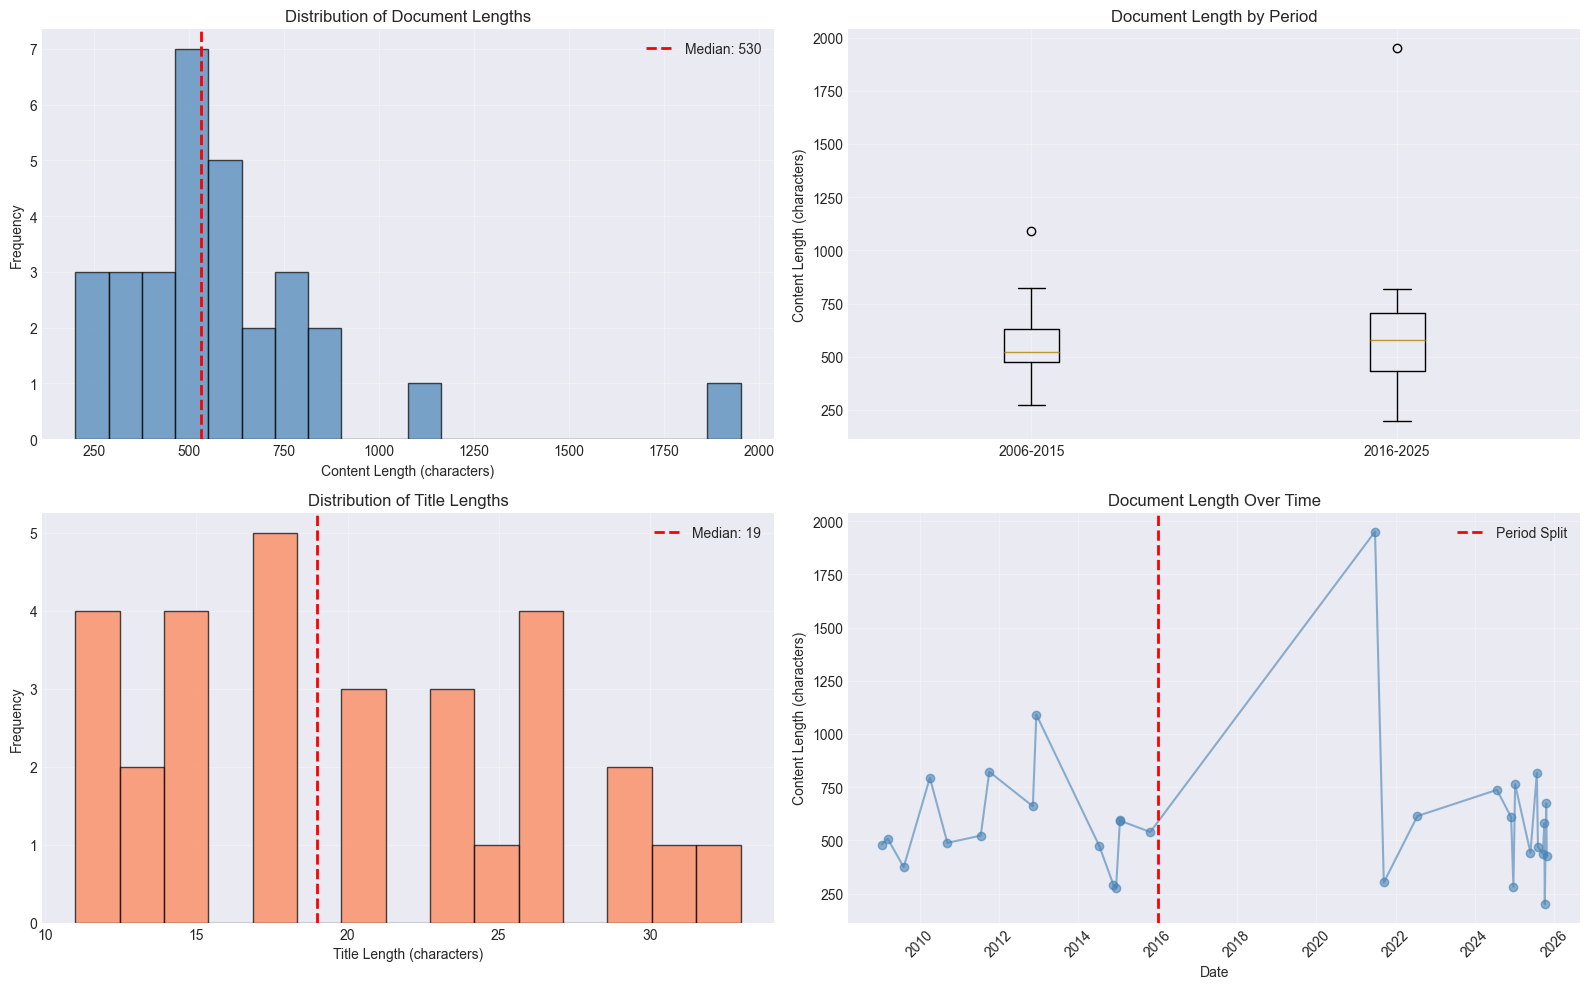


📏 Text Length Statistics:
Content Length:
  Min: 200 characters
  Max: 1951 characters
  Mean: 594 characters
  Median: 530 characters

Title Length:
  Min: 11 characters
  Max: 33 characters
  Mean: 20.1 characters
  Median: 19 characters

📊 By Period:

2006-2015:
  Documents: 15
  Avg length: 567 chars
  Avg title: 14.7 chars

2016-2025:
  Documents: 15
  Avg length: 620 chars
  Avg title: 25.5 chars


In [27]:
# Calculate text lengths
raw_data['text_length'] = raw_data['news_content'].str.len()
raw_data['title_length'] = raw_data['news_title'].str.len()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Content length distribution
axes[0, 0].hist(raw_data['text_length'], bins=20, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Content Length (characters)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Document Lengths')
axes[0, 0].axvline(raw_data['text_length'].median(), color='red', linestyle='--', 
                   linewidth=2, label=f'Median: {raw_data["text_length"].median():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Content length by period
period_2006 = raw_data[raw_data['period'] == '2006-2015']['text_length']
period_2016 = raw_data[raw_data['period'] == '2016-2025']['text_length']

axes[0, 1].boxplot([period_2006, period_2016], labels=['2006-2015', '2016-2025'])
axes[0, 1].set_ylabel('Content Length (characters)')
axes[0, 1].set_title('Document Length by Period')
axes[0, 1].grid(True, alpha=0.3)

# 3. Title length distribution
axes[1, 0].hist(raw_data['title_length'], bins=15, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Title Length (characters)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Title Lengths')
axes[1, 0].axvline(raw_data['title_length'].median(), color='red', linestyle='--',
                   linewidth=2, label=f'Median: {raw_data["title_length"].median():.0f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Content length over time
raw_data_sorted = raw_data.sort_values('news_date')
axes[1, 1].plot(raw_data_sorted['news_date'], raw_data_sorted['text_length'], 
                marker='o', linestyle='-', alpha=0.6, color='steelblue')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Content Length (characters)')
axes[1, 1].set_title('Document Length Over Time')
axes[1, 1].axvline(pd.Timestamp('2015-12-31'), color='red', linestyle='--', 
                   linewidth=2, label='Period Split')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("\n📏 Text Length Statistics:")
print("=" * 60)
print(f"Content Length:")
print(f"  Min: {raw_data['text_length'].min()} characters")
print(f"  Max: {raw_data['text_length'].max()} characters")
print(f"  Mean: {raw_data['text_length'].mean():.0f} characters")
print(f"  Median: {raw_data['text_length'].median():.0f} characters")
print(f"\nTitle Length:")
print(f"  Min: {raw_data['title_length'].min()} characters")
print(f"  Max: {raw_data['title_length'].max()} characters")
print(f"  Mean: {raw_data['title_length'].mean():.1f} characters")
print(f"  Median: {raw_data['title_length'].median():.0f} characters")

print(f"\n📊 By Period:")
print("=" * 60)
for period in ['2006-2015', '2016-2025']:
    period_data = raw_data[raw_data['period'] == period]
    print(f"\n{period}:")
    print(f"  Documents: {len(period_data)}")
    print(f"  Avg length: {period_data['text_length'].mean():.0f} chars")
    print(f"  Avg title: {period_data['title_length'].mean():.1f} chars")

## 15. Text Length Analysis

Analyze the length characteristics of the raw documents.

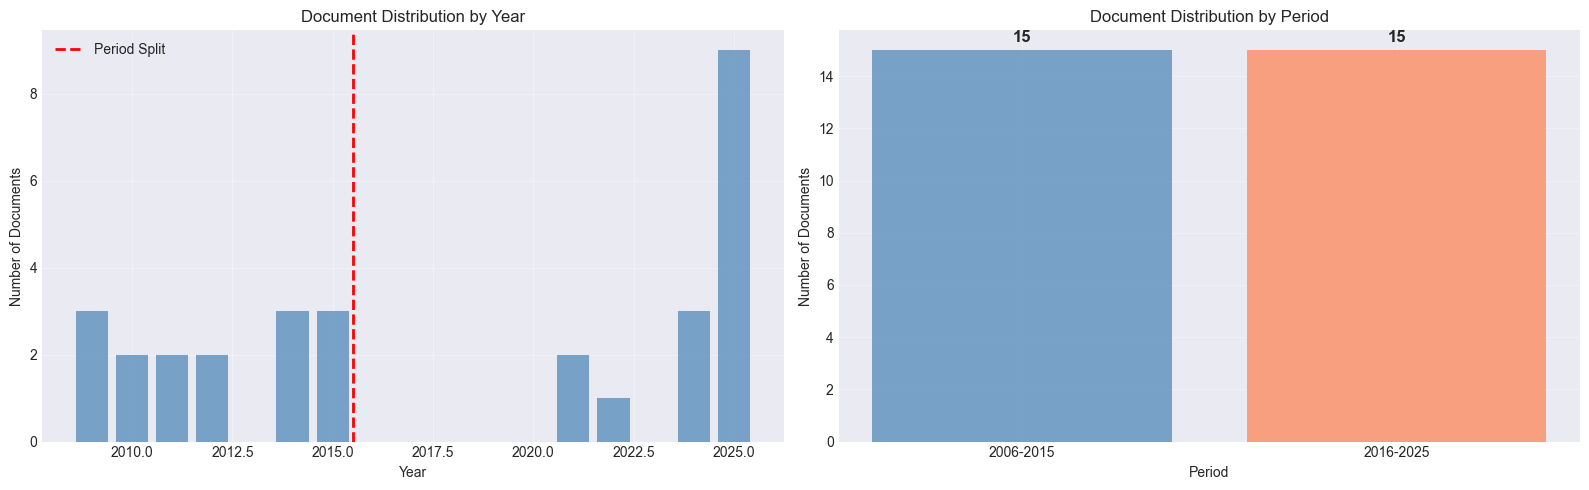


📅 Period Split:
   2006-2015: 15 documents
   2016-2025: 15 documents


In [28]:
# Visualize temporal distribution of documents
raw_data['news_date'] = pd.to_datetime(raw_data['news_date'])
raw_data['year'] = raw_data['news_date'].dt.year

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. Documents per year
year_counts = raw_data['year'].value_counts().sort_index()
axes[0].bar(year_counts.index, year_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Documents')
axes[0].set_title('Document Distribution by Year')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=2015.5, color='red', linestyle='--', linewidth=2, label='Period Split')
axes[0].legend()

# 2. Period distribution (2006-2015 vs 2016-2025)
raw_data['period'] = raw_data['year'].apply(lambda x: '2006-2015' if x <= 2015 else '2016-2025')
period_counts = raw_data['period'].value_counts()

axes[1].bar(period_counts.index, period_counts.values, color=['steelblue', 'coral'], alpha=0.7)
axes[1].set_xlabel('Period')
axes[1].set_ylabel('Number of Documents')
axes[1].set_title('Document Distribution by Period')
axes[1].grid(True, alpha=0.3)

# Add count labels on bars
for i, (period, count) in enumerate(period_counts.items()):
    axes[1].text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📅 Period Split:")
print(f"   2006-2015: {period_counts.get('2006-2015', 0)} documents")
print(f"   2016-2025: {period_counts.get('2016-2025', 0)} documents")

In [29]:
# Load the primary raw data
#raw_data = pd.read_csv('../data/03_primary/jianshi_news_raw.csv')

print("=" * 70)
print("PRIMARY DATA OVERVIEW")
print("=" * 70)
print(f"\nTotal documents: {len(raw_data)}")
print(f"Columns: {list(raw_data.columns)}")
print(f"\nDate range: {raw_data['news_date'].min()} to {raw_data['news_date'].max()}")

# Show first few rows
print("\n" + "=" * 70)
print("SAMPLE DATA")
print("=" * 70)
display(raw_data.head())

# Show data distribution
print("\n" + "=" * 70)
print("DATA STATISTICS")
print("=" * 70)
print(raw_data.describe(include='all'))

PRIMARY DATA OVERVIEW

Total documents: 30
Columns: ['news_date', 'news_title', 'news_content', 'text_length', 'title_length', 'year', 'period']

Date range: 2009-01-16 00:00:00 to 2025-10-22 00:00:00

SAMPLE DATA


,news_date,news_title,news_content,text_length,title_length,year,period
0,2015-01-19,新竹縣油羅溪尖石公、尖石母，露全貌,河床罕見乾涸 吸引遊客觀賞\n新竹縣旱象嚴重，尖石鄉油羅溪上游乾涸，河床上象徵尖石鄉名由來的...,597,17,2015,2006-2015
1,2010-04-05,水田部落秘圳47年後「再發現」,新竹縣尖石鄉新樂村的水田部落，日治時期曾遍佈一層層的美麗梯田，而造就這原鄉罕見的水稻景致，歸...,794,15,2010,2006-2015
2,2014-12-14,黑暗部落成最賺錢部落，司馬庫斯創造觀光奇蹟,新竹縣尖石鄉司馬庫斯是台灣最偏遠的原住民部落，因為位處深山交通不便，且長期沒有電力供應，曾被...,275,21,2014,2006-2015
3,2011-07-17,泰雅人尋根，翻山越嶺返聖地,新竹縣尖石鄉文化歲時祭儀活動，今年首度展開尋根之旅，祭儀前三天，鄉長雲天寶與長老親自帶領各村...,522,13,2011,2006-2015
4,2011-10-04,賽夏族朝聖之旅，靈異「撞」況多,大霸尖山是賽夏族的祖靈聖山，賽夏族耆老風德和九月十五日到十七日率領六十多名各姓氏族人前往朝聖...,822,15,2011,2006-2015



DATA STATISTICS
                  news_date         news_title  \
count                    30                 30   
unique                  NaN                 30   
top                     NaN  新竹縣油羅溪尖石公、尖石母，露全貌   
freq                    NaN                  1   
mean    2018-08-16 00:00:00                NaN   
min     2009-01-16 00:00:00                NaN   
25%     2012-11-16 00:00:00                NaN   
50%     2018-08-24 12:00:00                NaN   
75%     2025-04-19 18:00:00                NaN   
max     2025-10-22 00:00:00                NaN   
std                     NaN                NaN   

                                             news_content  text_length  \
count                                                  30    30.000000   
unique                                                 30          NaN   
top     河床罕見乾涸 吸引遊客觀賞\n新竹縣旱象嚴重，尖石鄉油羅溪上游乾涸，河床上象徵尖石鄉名由來的...          NaN   
freq                                                    1          NaN   
mean        

## 14. Load and Visualize Primary Data

Let's examine the raw input data from `data/03_primary/` to understand the corpus.

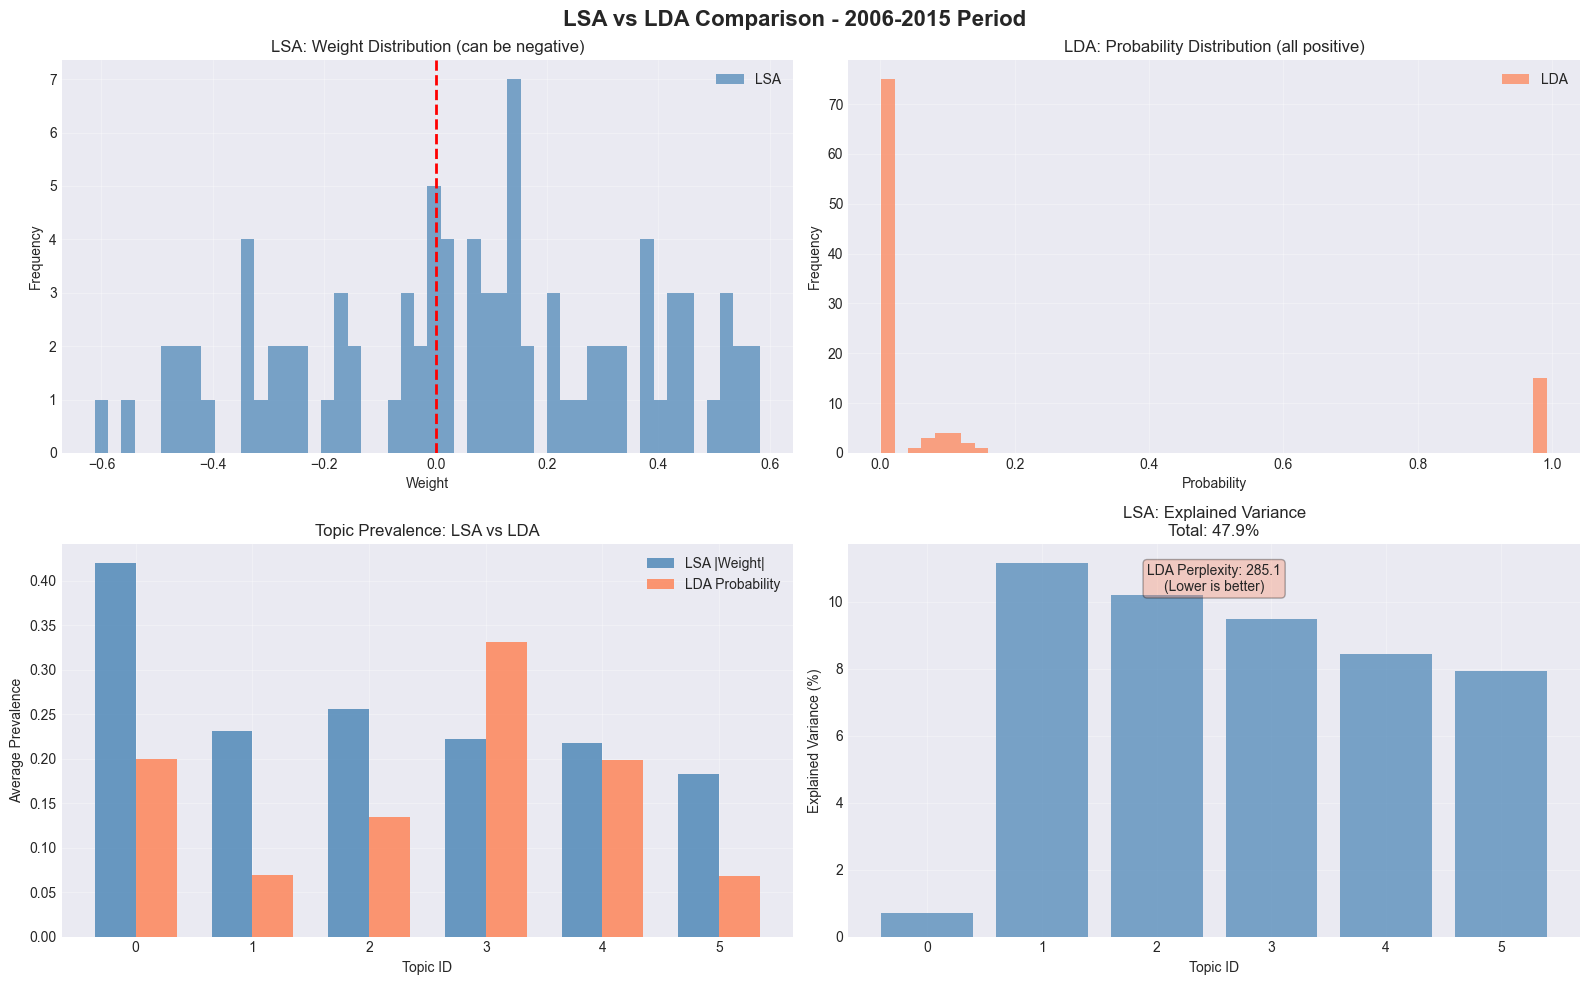


📊 Key Differences:
LSA: Uses TF-IDF (emphasizes rare/distinctive terms)
     Can have negative weights (bidirectional topics)
     Total variance explained: 47.91%

LDA: Uses raw counts (all terms weighted equally)
     All positive probabilities (sum to 1.0)
     Perplexity: 285.08


In [30]:
# Compare Topic 0 (Background Context) between LSA and LDA for 2006-2015
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('LSA vs LDA Comparison - 2006-2015 Period', fontsize=16, fontweight='bold')

# Get document-topic data
lsa_doc_topics_2006 = lsa_2006['doc_topics'].filter(regex='^topic_')
lda_doc_topics_2006 = lda_2006['doc_topics'].filter(regex='^topic_')

# 1. Weight/Probability Distribution Comparison
axes[0, 0].hist(lsa_doc_topics_2006.values.flatten(), bins=50, alpha=0.7, label='LSA', color='steelblue')
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Weight')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('LSA: Weight Distribution (can be negative)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(lda_doc_topics_2006.values.flatten(), bins=50, alpha=0.7, label='LDA', color='coral')
axes[0, 1].set_xlabel('Probability')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('LDA: Probability Distribution (all positive)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 2. Topic Prevalence Comparison
lsa_prevalence = lsa_doc_topics_2006.abs().mean()
lda_prevalence = lda_doc_topics_2006.mean()

# Use the minimum length to ensure compatibility
n_topics = min(len(lsa_prevalence), len(lda_prevalence), len(lsa_2006['explained_variance']))
x = np.arange(n_topics)
width = 0.35

# Ensure we only use matching lengths
lsa_prev_plot = lsa_prevalence[:n_topics]
lda_prev_plot = lda_prevalence[:n_topics]

axes[1, 0].bar(x - width/2, lsa_prev_plot, width, label='LSA |Weight|', alpha=0.8, color='steelblue')
axes[1, 0].bar(x + width/2, lda_prev_plot, width, label='LDA Probability', alpha=0.8, color='coral')
axes[1, 0].set_xlabel('Topic ID')
axes[1, 0].set_ylabel('Average Prevalence')
axes[1, 0].set_title('Topic Prevalence: LSA vs LDA')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 3. Explained Variance (LSA) vs Perplexity Note (LDA)
explained_var = lsa_2006['explained_variance'][:n_topics]
axes[1, 1].bar(range(n_topics), explained_var * 100, color='steelblue', alpha=0.7)
axes[1, 1].set_xlabel('Topic ID')
axes[1, 1].set_ylabel('Explained Variance (%)')
axes[1, 1].set_title(f'LSA: Explained Variance\nTotal: {lsa_2006["total_variance_explained"]:.1%}')
axes[1, 1].grid(True, alpha=0.3)

# Add text annotation for LDA
axes[1, 1].text(0.5, 0.95, 
                f'LDA Perplexity: {lda_2006["perplexity"]:.1f}\n(Lower is better)',
                transform=axes[1, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='coral', alpha=0.3),
                verticalalignment='top',
                horizontalalignment='center')

plt.tight_layout()
plt.show()

print("\n📊 Key Differences:")
print("=" * 60)
print("LSA: Uses TF-IDF (emphasizes rare/distinctive terms)")
print("     Can have negative weights (bidirectional topics)")
print(f"     Total variance explained: {lsa_2006['total_variance_explained']:.2%}")
print()
print("LDA: Uses raw counts (all terms weighted equally)")
print("     All positive probabilities (sum to 1.0)")
print(f"     Perplexity: {lda_2006['perplexity']:.2f}")